In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from datetime import datetime
from sklearn.model_selection import train_test_split
#import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
import seaborn as sns

In [44]:
nydata=pd.read_csv("C:\\Users\\emb-ashwcho\\Downloads\\newyorkdata\\train\\train.csv")


In [45]:
nydatatest = pd.read_csv('C:\\Users\\emb-ashwcho\\Downloads\\newyorkdata\\test\\test.csv')


In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

nydata.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435


In [39]:
nydata.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [40]:
nydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [28]:
#nydata.drop(nydata.columns[[0,1,3,]], axis=1,inplace=True)

In [59]:
m = np.mean(nydata['trip_duration'])
s = np.std(nydata['trip_duration'])
nydata = nydata[nydata['trip_duration'] <= m + 2*s]
nydata = nydata[nydata['trip_duration'] >= m - 2*s]

In [60]:
nydata = nydata[nydata['pickup_longitude'] <= -73.75]
nydata = nydata[nydata['pickup_longitude'] >= -74.03]
nydata = nydata[nydata['pickup_latitude'] <= 40.85]
nydata = nydata[nydata['pickup_latitude'] >= 40.63]
nydata = nydata[nydata['dropoff_longitude'] <= -73.75]
nydata = nydata[nydata['dropoff_longitude'] >= -74.03]
nydata = nydata[nydata['dropoff_latitude'] <= 40.85]
nydata = nydata[nydata['dropoff_latitude'] >= 40.63]

In [61]:
nydata['pickup_datetime'] = pd.to_datetime(nydata.pickup_datetime)
nydatatest['pickup_datetime'] = pd.to_datetime(nydatatest.pickup_datetime)
nydata.loc[:, 'pickup_date'] = nydata['pickup_datetime'].dt.date
nydatatest.loc[:, 'pickup_date'] = nydatatest['pickup_datetime'].dt.date
nydata['dropoff_datetime'] = pd.to_datetime(nydata.dropoff_datetime) 

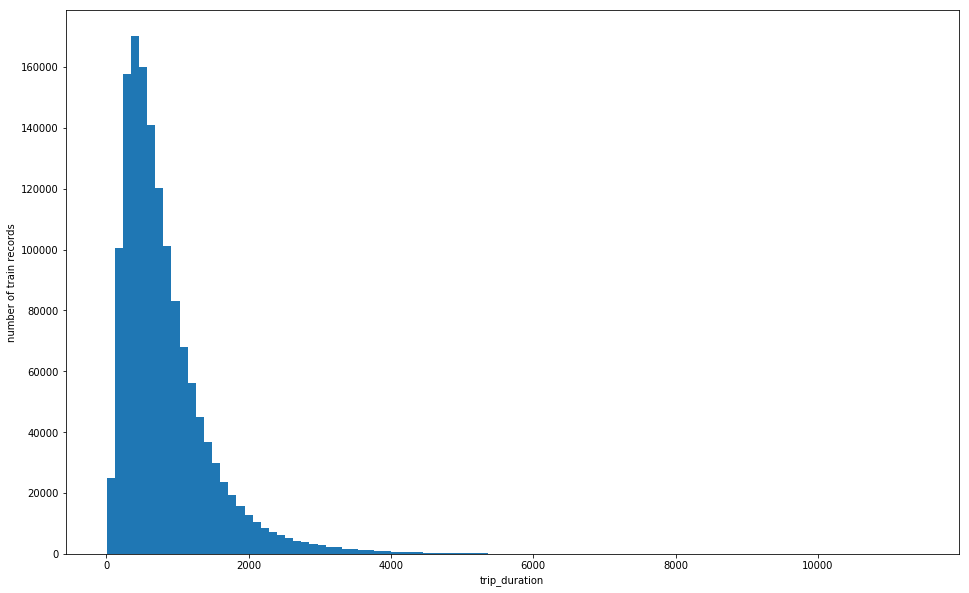

In [63]:
plt.hist(nydata['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

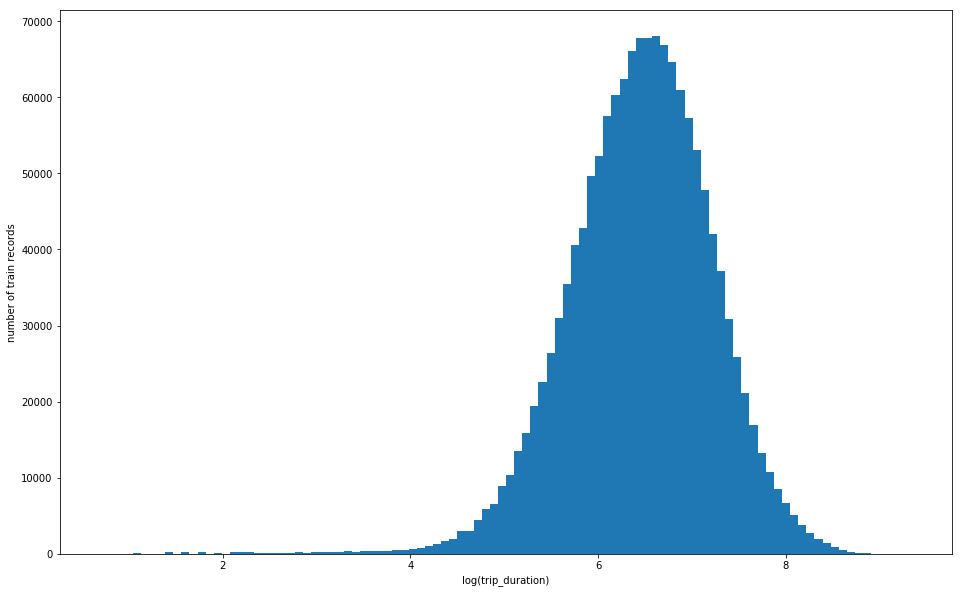

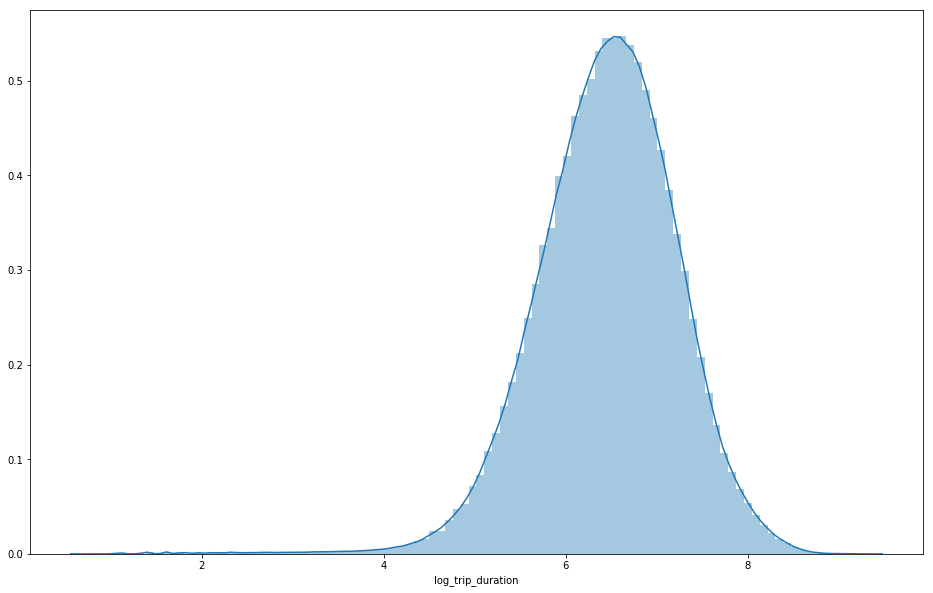

In [66]:
nydata['log_trip_duration'] = np.log(nydata['trip_duration'].values + 1)
plt.hist(nydata['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()
sns.distplot(nydata["log_trip_duration"], bins =100)

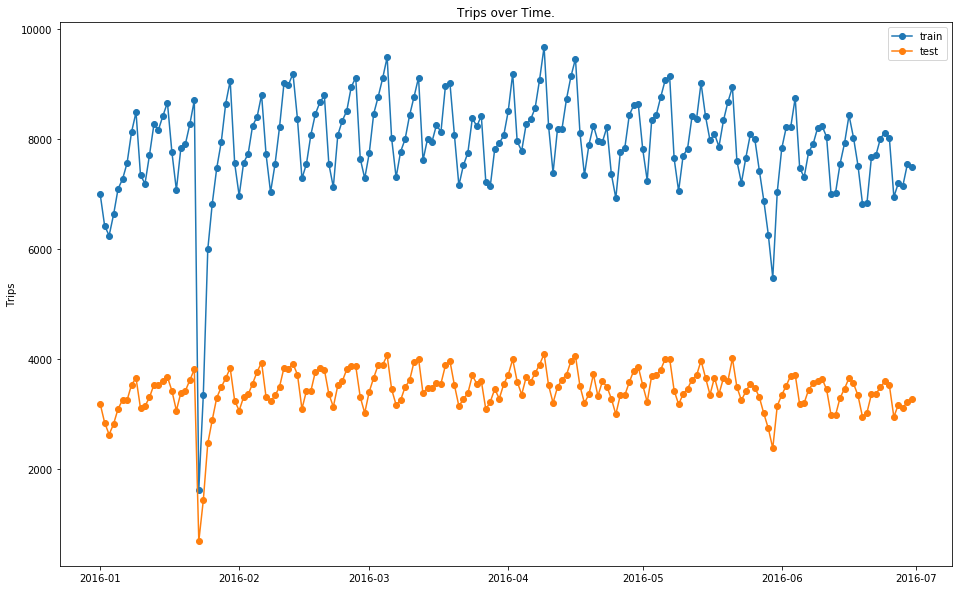

In [68]:
plt.plot(nydata.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(nydatatest.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

No handles with labels found to put in legend.


Text(0,0.5,'Time in Seconds')

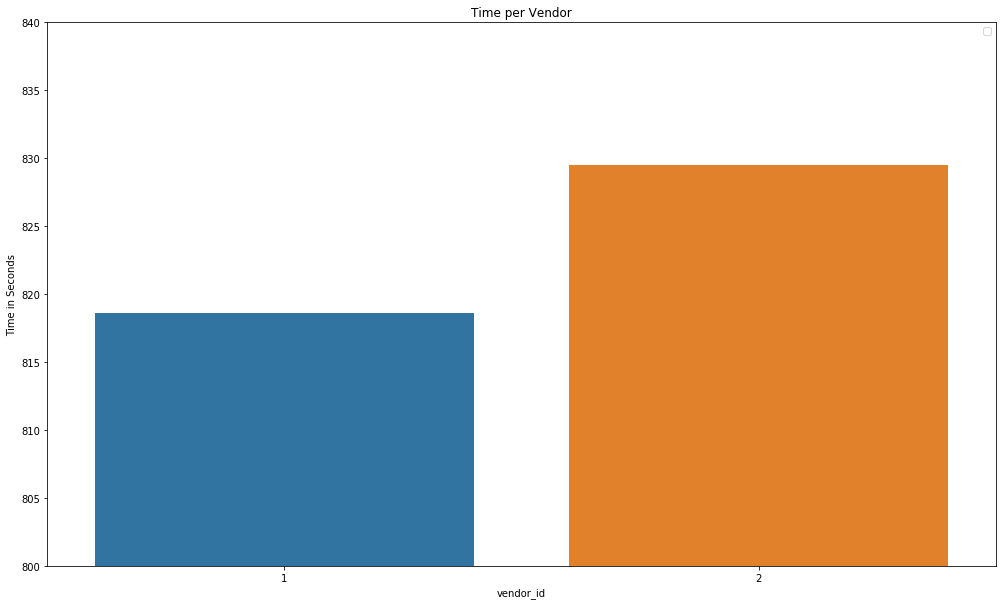

In [70]:
import warnings
warnings.filterwarnings("ignore")
plot_vendor = nydata.groupby('vendor_id')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=800)
plt.ylim(ymax=840)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Time per Vendor')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')

No handles with labels found to put in legend.


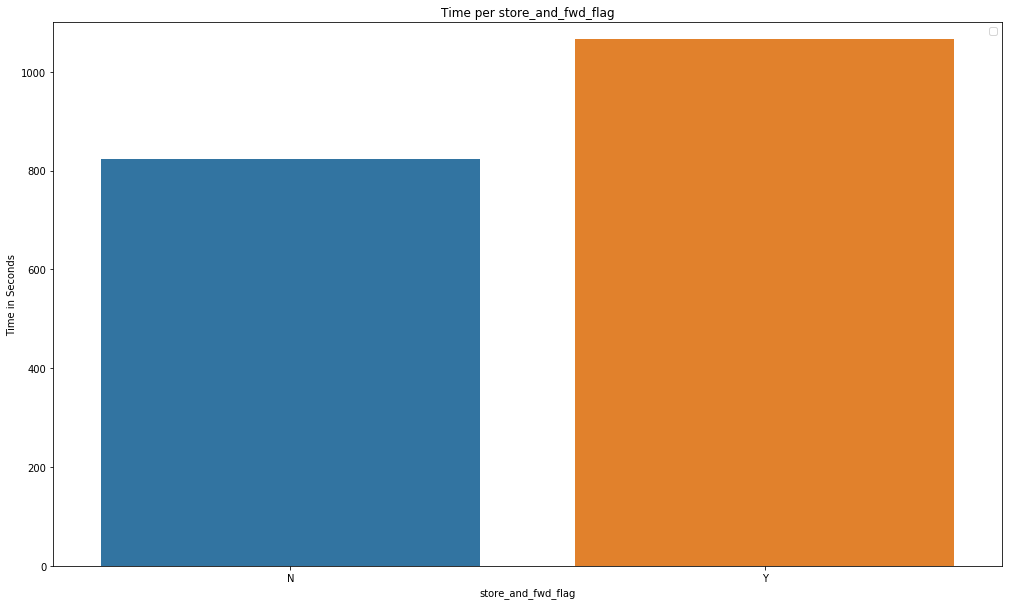

In [72]:
snwflag = nydata.groupby('store_and_fwd_flag')['trip_duration'].mean()

plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(snwflag.index,snwflag.values)

No handles with labels found to put in legend.


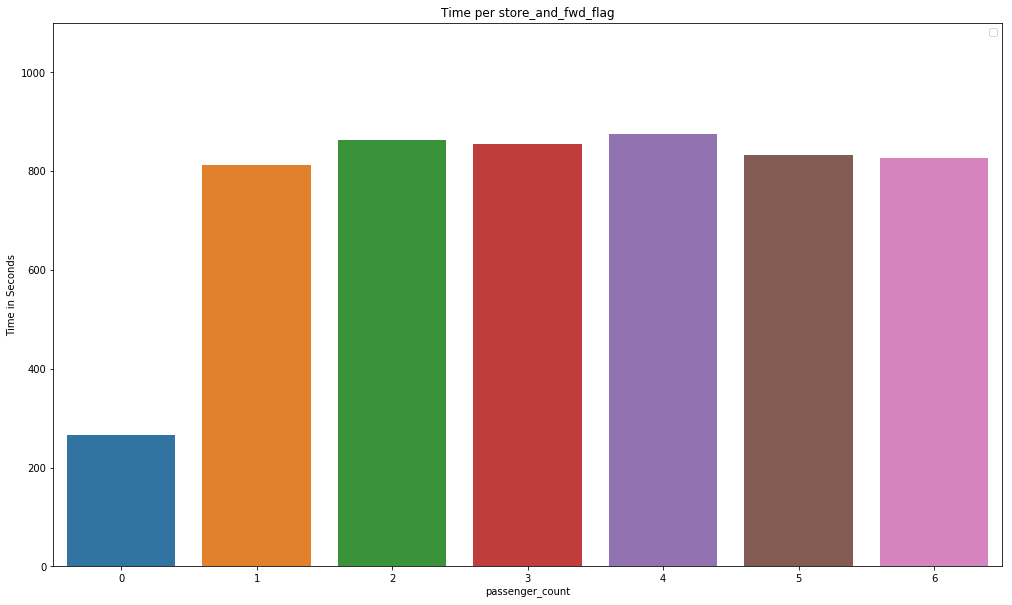

In [74]:
pc = nydata.groupby('passenger_count')['trip_duration'].mean()

plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(pc.index,pc.values)

In [77]:
nydata.groupby('passenger_count').size()


passenger_count
0         52
1    1018715
2     206864
3      58989
4      27957
5      76912
6      47639
dtype: int64

In [80]:
nydatatest.groupby('passenger_count').size()


passenger_count
0        23
1    443447
2     90027
3     25686
4     12017
5     33411
6     20521
9         2
dtype: int64